In [99]:
import os
import re
import json

import numpy as np
import matplotlib.pyplot as plt

from scipy.spatial.transform import Rotation as R

import pandas as pd

wrong_rec = False

# root_dir = "datasets/quest2/openhand"
# root_dir = "datasets/quest2/quest_noshake_files"
# root_dir = "datasets/nrealX/test2_2023-02-27-12-54-23/predict_data"
# root_dir = "datasets/nrealX/UpRightStaticHand_test2_2023-03-01-16-50-30/predicted_data"
# root_dir = "datasets/quest2/files"
# root_dir = "datasets/nrealX/test2_2023-03-01-17-36-44/predicted_data"
# root_dir = "datasets/quest2/LeftStaticHand_quest/quest_down1"                  # moving case
# root_dir = "datasets/quest2/LeftStaticHand_quest/quest_down2"
# root_dir = "datasets/quest2/LeftStaticHand_quest/quest_front1"
# root_dir = "datasets/quest2/LeftStaticHand_quest/quest_up1"
# root_dir = "datasets/quest2/LeftStaticHand_quest/quest_left1"
# root_dir = "datasets/quest2/LeftStaticHand_quest/quest_right1";wrong_rec=True
# root_dir = "datasets/quest2/RightStaticHand_quest/quest_down1"
# root_dir = "datasets/quest2/RightStaticHand_quest/quest_left1"
# root_dir = "datasets/quest2/RightStaticHand_quest/quest_up1"
root_dir = "datasets/quest2/RightStaticHand_quest/quest_front1"


# root_dir = "datasets/nrealX/RightStaticHand/front_test2_2023-03-02-15-18-20/predicted_data"
# root_dir = "datasets/nrealX/RightStaticHand/Uptest2_2023-03-02-11-32-50/predicted_data"
# root_dir = "datasets/nrealX/RightStaticHand/below_test2_2023-03-02-15-48-41/predicted_data"
# root_dir = "datasets/nrealX/RightStaticHand/right_test2_2023-03-02-16-09-56/predicted_data"


if 'Left' in root_dir:
    test_left = True
elif 'Right' in root_dir:
    test_left = False
else:
    raise KeyError

if wrong_rec:
    test_left = not test_left


# root_dir = "datasets/nrealX/LeftStaticHand/left_test2_2023-03-02-16-27-53/hand_record_data"
save_dir = root_dir.replace("datasets", "outputs")
os.makedirs(save_dir, exist_ok=True)

In [100]:
# get files and sorted by timestamp

file_list = os.listdir(root_dir)

file_list = list(filter(lambda x: ("predicted" in x), file_list))
# file_list = list(filter(lambda x: ("inference" in x), file_list))
file_list.sort()
len_file = len(file_list)
print(len_file)

19531


In [101]:
gesture_list = dict()
is_tracked = dict()
keypoints = dict()
orientation = dict()

time_list = []
gesture_list["left"] = []
gesture_list["right"] = []
is_tracked["left"] = []
is_tracked["right"] = []
keypoints["left"] = []
keypoints["right"] = []
orientation["left"] = []
orientation["right"] = []

start_time = int(file_list[0].split('_')[1])

In [102]:

for index, filename in enumerate(file_list):
    
    timestamp_ns = int(filename.split('_')[1])
    
    rel_time_sec = (timestamp_ns - start_time) / 1e9
    
    with open(os.path.join(root_dir, filename), 'r') as f:
        data = json.load(f)
    
    time_list.append(rel_time_sec)
    # gesture_list["left"].append(data["lefthand"]["gesture_result"])
    # gesture_list["right"].append(data["righthand"]["gesture_result"])

    # left_tracked, right_tracked = data["leftright_hand_status"]
    # is_tracked["left"].append(left_tracked)
    # is_tracked["right"].append(right_tracked)


    is_tracked["left"].append(data["lefthand"]["is_tracked"])
    is_tracked["right"].append(data["righthand"]["is_tracked"])
    if data["lefthand"]["is_tracked"]:
    # print(filename)
    # if left_tracked:
        # keypoints["left"].append(np.array(data["mid_inference"]["09_worldmano"]["lefthand"]).reshape(23,3))
        
        keypoints["left"].append(np.array(data["lefthand"]["keypoints"]).reshape(23,3))
        # orientation["left"].append(np.array(data["lefthand"]["orientation"]).reshape(23,4))
    else:
        # ocupy a index place
        keypoints["left"].append(None)
        
    if data["righthand"]["is_tracked"]:
    # if right_tracked:
        # keypoints["right"].append(np.array(data["mid_inference"]["09_worldmano"]["righthand"]).reshape(23,3))

        keypoints["right"].append(np.array(data["righthand"]["keypoints"]).reshape(23,3))
        # orientation["right"].append(np.array(data["righthand"]["orientation"]).reshape(23,4))
    else:
        #ocupy a index place
        keypoints["right"].append(None)
    

righthand 0 mean:  [-0.81841485 -0.53924725  0.1751284 ]
righthand 0 std:  [0.00147869 0.0004784  0.00040523]
righthand 0 abs mean err:  [0.00120765 0.0003872  0.00031437]
time_list_tmp: [90.717004, 90.72991, 90.751357, 90.761856, 90.771728, 90.793713, 90.800219, 90.812565, 90.827392, 90.842291, 90.863247, 90.870046, 90.883255, 90.905998, 90.91199, 90.928078, 90.938612, 90.95471, 90.970923, 90.981157, 91.003105, 91.019582, 91.022033, 91.035593, 91.056655, 91.067566, 91.076774, 91.10073, 91.106276, 91.117249, 91.133227, 91.149888, 91.16605, 91.174576, 91.198479, 91.20408, 91.214808, 91.230758, 91.246781, 91.268256, 91.271859, 91.285952, 91.30263, 91.318467, 91.326964, 91.350989, 91.355029, 91.368094, 91.384849, 91.40076, 91.410622, 91.424922, 91.449292, 91.453242, 91.476872, 91.482582, 91.492031, 91.506018, 91.531031, 91.536656, 91.54738, 91.56165, 91.579886, 91.591394, 91.604778, 91.619683, 91.645316, 91.648202, 91.660019, 91.677455, 91.693466, 91.702118, 91.715903, 91.735986, 91.74476

/tmp/ipykernel_30891/393432045.py:92: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure()


time_list_tmp: [90.717004, 90.72991, 90.751357, 90.761856, 90.771728, 90.793713, 90.800219, 90.812565, 90.827392, 90.842291, 90.863247, 90.870046, 90.883255, 90.905998, 90.91199, 90.928078, 90.938612, 90.95471, 90.970923, 90.981157, 91.003105, 91.019582, 91.022033, 91.035593, 91.056655, 91.067566, 91.076774, 91.10073, 91.106276, 91.117249, 91.133227, 91.149888, 91.16605, 91.174576, 91.198479, 91.20408, 91.214808, 91.230758, 91.246781, 91.268256, 91.271859, 91.285952, 91.30263, 91.318467, 91.326964, 91.350989, 91.355029, 91.368094, 91.384849, 91.40076, 91.410622, 91.424922, 91.449292, 91.453242, 91.476872, 91.482582, 91.492031, 91.506018, 91.531031, 91.536656, 91.54738, 91.56165, 91.579886, 91.591394, 91.604778, 91.619683, 91.645316, 91.648202, 91.660019, 91.677455, 91.693466, 91.702118, 91.715903, 91.735986, 91.744768, 91.76786, 91.773624, 91.788995, 91.798635, 91.816226, 91.83272, 91.841097, 91.855053, 91.870293, 91.893201, 91.897381, 91.911672, 91.932934, 91.938283, 91.954438, 91.971

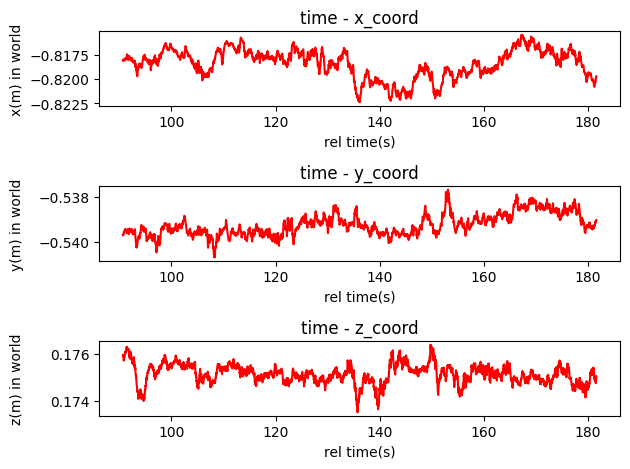

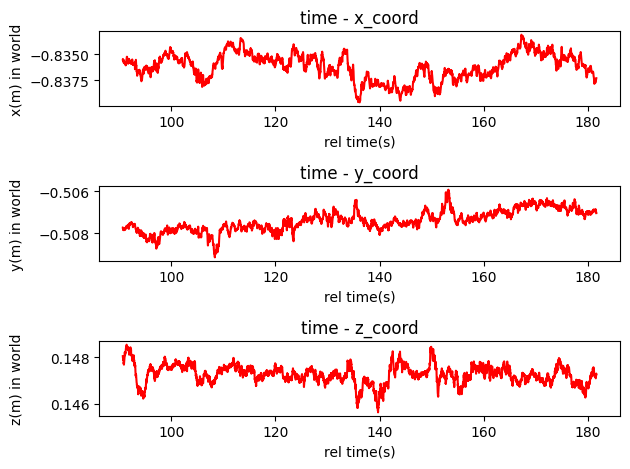

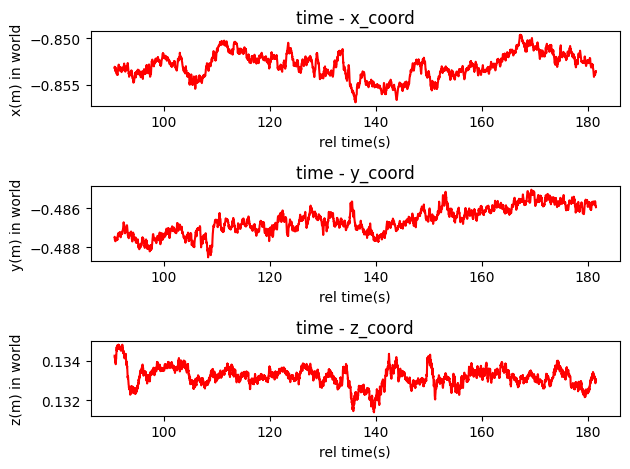

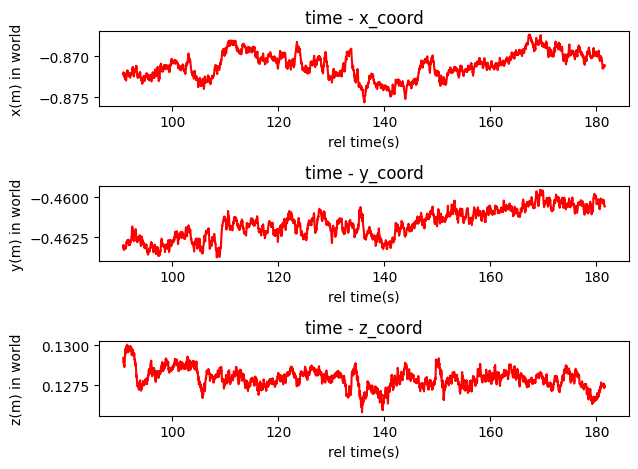

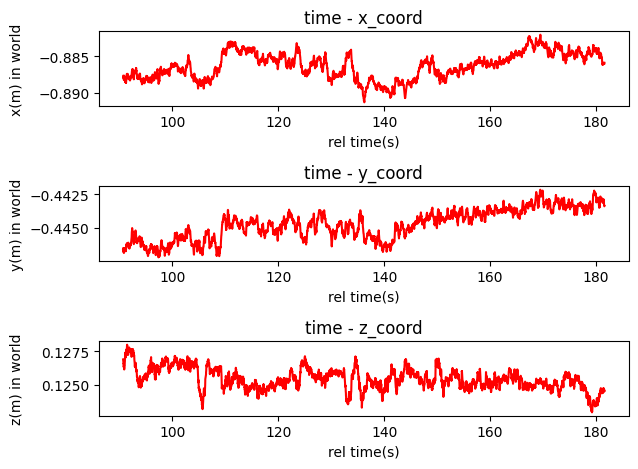

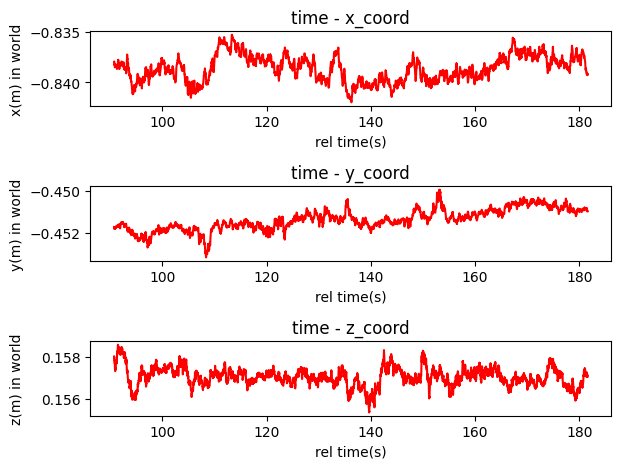

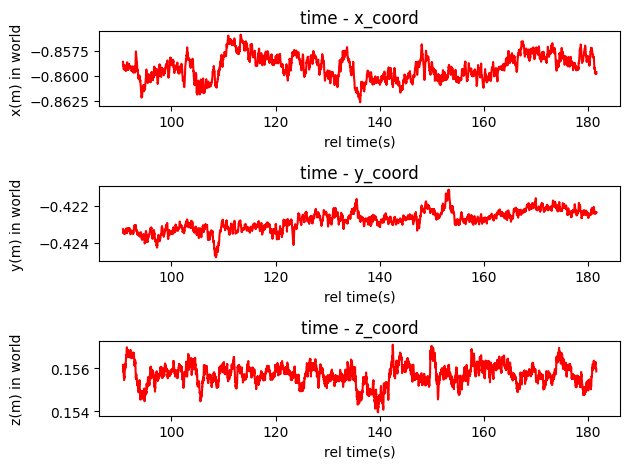

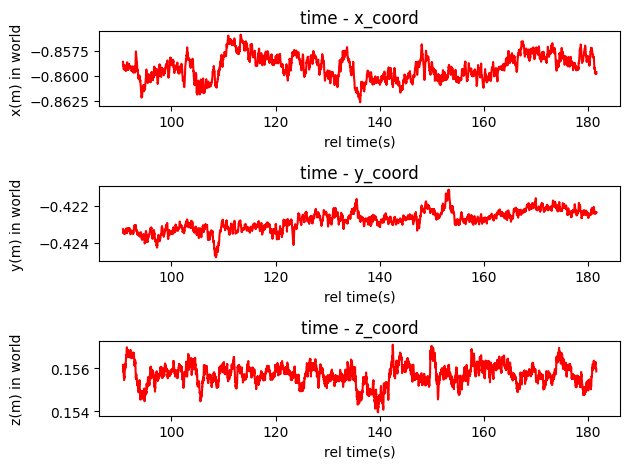

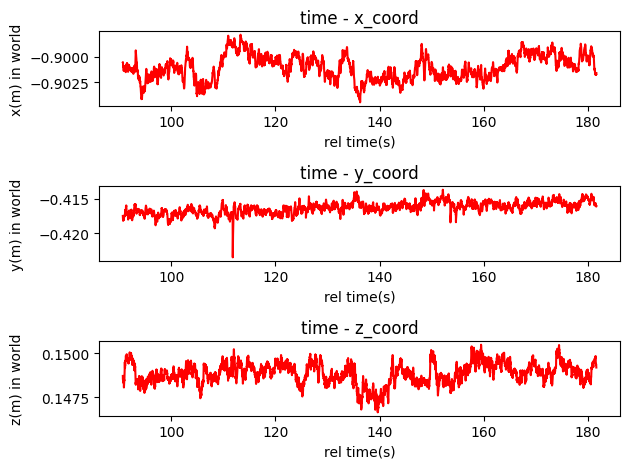

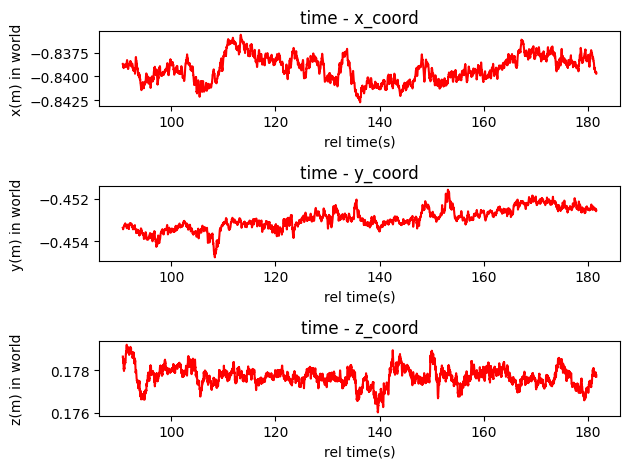

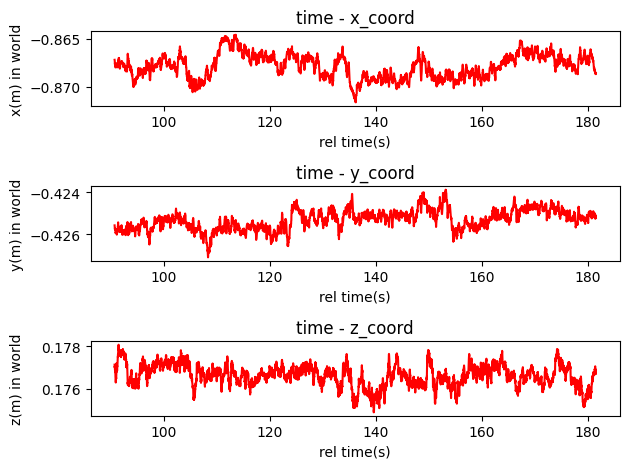

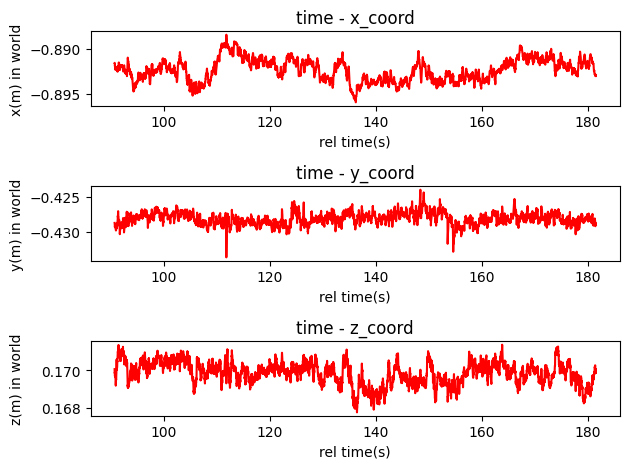

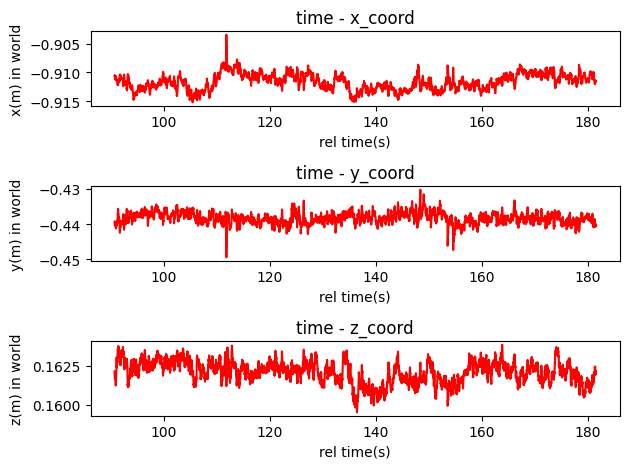

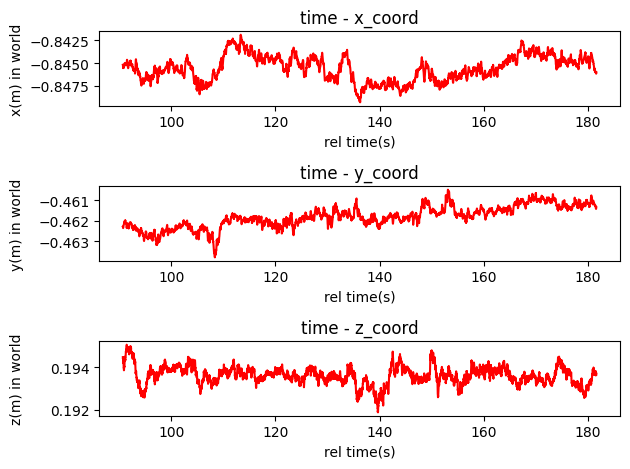

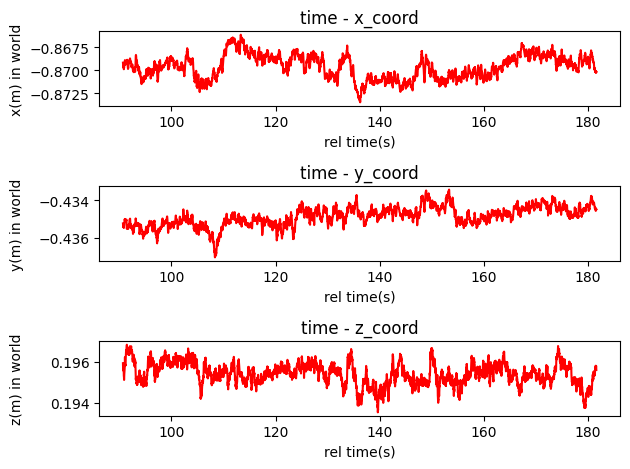

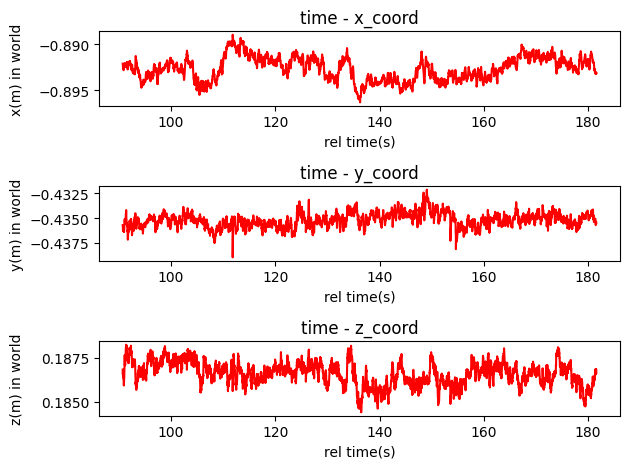

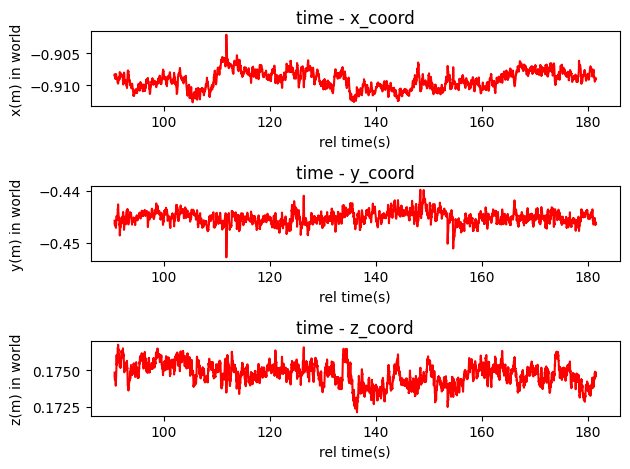

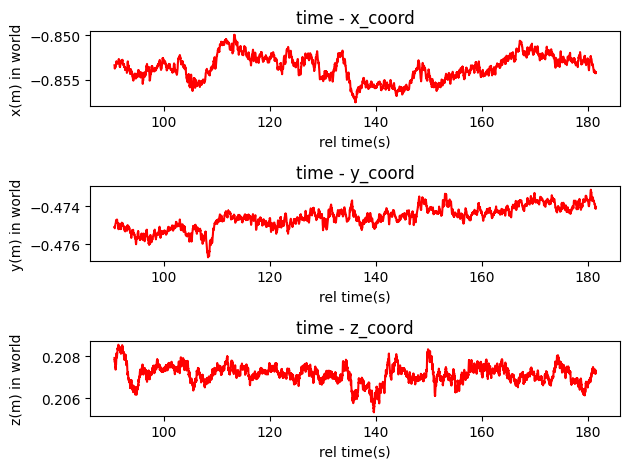

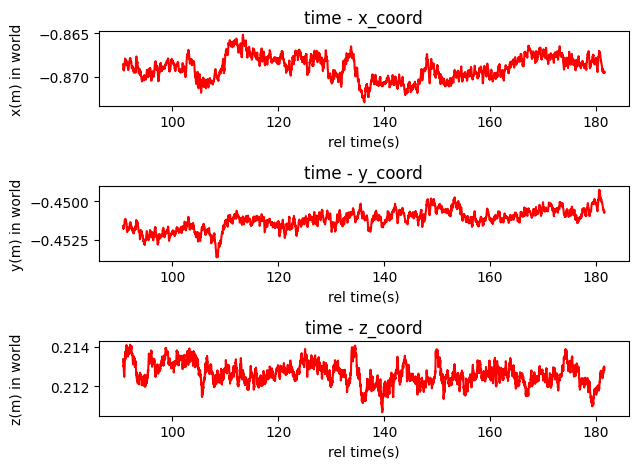

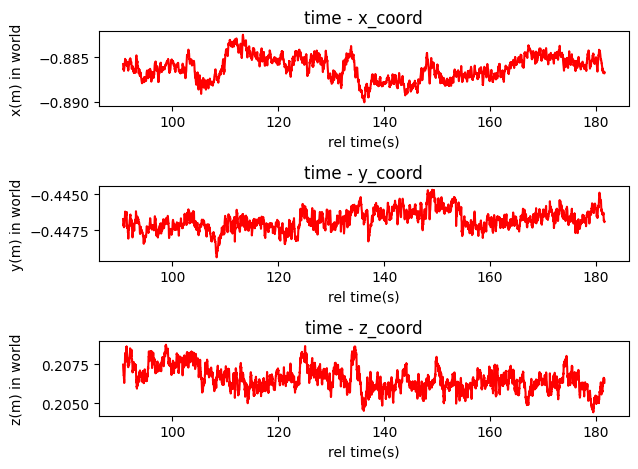

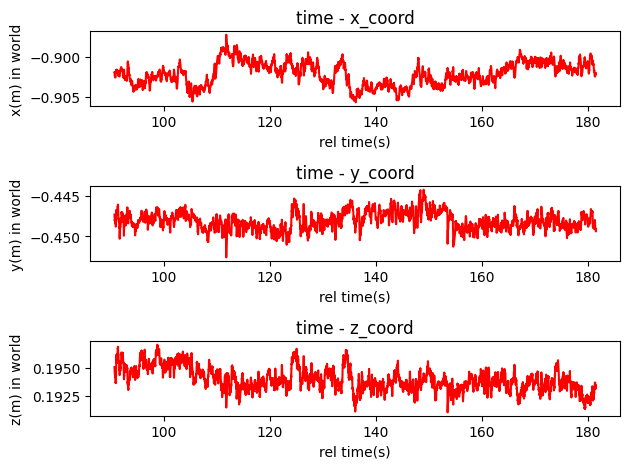

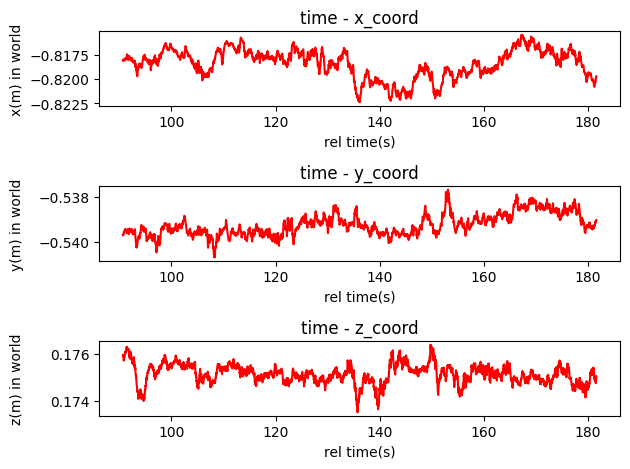

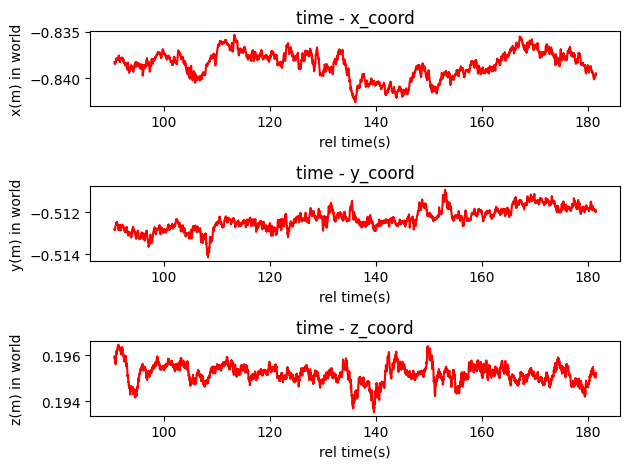

In [103]:
# compute mean, var, abserr of right hand keypoint index 21(center), finally plot x axis curve

start_time = int(len_file/3)
end_time = int(len_file*2/3)

# start_time = 0
# end_time = len_file



pd_index_list = []

pd_data = {}
pd_data["x_mean"] = []
pd_data["x_std"] = []
pd_data["x_abs_mean_err"] = []
pd_data["y_mean"] = []
pd_data["y_std"] = []
pd_data["y_abs_mean_err"] = []
pd_data["z_mean"] = []
pd_data["z_std"] = []
pd_data["z_abs_mean_err"] = []
pd_data["space_abs_mean_err"] = []
pd_data["pk_pk_x"] = []
pd_data["pk_pk_y"] = []
pd_data["pk_pk_z"] = []
pd_data["pk_pk_angle_x"] = []
pd_data["pk_pk_angle_y"] = []
pd_data["pk_pk_angle_z"] = []

for index in range(23):
    time_list_tmp = []
    keypoints_tmp = []
    orientations_tmp = []
    
    pd_index_list.append(f"point {index}")
    
    if test_left:

        for i in range(start_time, end_time):
        
            if is_tracked["left"][i]:
            # if is_tracked["left"][i]:
                time_list_tmp.append(time_list[i])
                keypoints_tmp.append(keypoints["left"][i][index])
                # keypoints_tmp.append(keypoints["left"][i][index])
                
                # r = R.from_quat(orientation["right"][i][index])
                # orientations_tmp.append(r.as_euler('xyz', degrees=True))
                # orientations_tmp.append(keypoints["right"][i][index])
    else:
        for i in range(start_time, end_time):
        
            if is_tracked["right"][i]:
            # if is_tracked["left"][i]:
                time_list_tmp.append(time_list[i])
                keypoints_tmp.append(keypoints["right"][i][index])

    
    keypoints_np = np.array(keypoints_tmp)
    # orientations_np = np.array(orientations_tmp)
    
    mean = np.mean(keypoints_np, axis=0)
    std = np.std(keypoints_np, axis=0)
    abs_mean_err = np.mean(np.abs(keypoints_np-mean), axis=0)
    
    pd_data["x_mean"].append(mean[0])
    pd_data["x_std"].append(std[0])
    pd_data["x_abs_mean_err"].append(abs_mean_err[0])
    pd_data["y_mean"].append(mean[1])
    pd_data["y_std"].append(std[1])
    pd_data["y_abs_mean_err"].append(abs_mean_err[1])
    pd_data["z_mean"].append(mean[2])
    pd_data["z_std"].append(std[2])
    pd_data["z_abs_mean_err"].append(abs_mean_err[2])
    pd_data["space_abs_mean_err"].append(np.sqrt(abs_mean_err[0]**2 + abs_mean_err[1]**2 + abs_mean_err[2]**2))
    
    pk_pk_pos = np.max(keypoints_np, axis = 0) - np.min(keypoints_np, axis = 0)
    pd_data["pk_pk_x"].append(pk_pk_pos[0])
    pd_data["pk_pk_y"].append(pk_pk_pos[1])
    pd_data["pk_pk_z"].append(pk_pk_pos[2])
    
    # pk_pk_ori = np.max(orientations_np, axis = 0) - np.min(orientations_np, axis = 0)
    # pd_data["pk_pk_angle_x"].append(pk_pk_ori[0])
    # pd_data["pk_pk_angle_y"].append(pk_pk_ori[1])
    # pd_data["pk_pk_angle_z"].append(pk_pk_ori[2])
    
    print("righthand {} mean: ".format(index), mean)
    print("righthand {} std: ".format(index), std)
    print("righthand {} abs mean err: ".format(index), abs_mean_err)
    
    fig = plt.figure()
    
    plt.subplot(3, 1, 1)
    plt.title("time - x_coord")
    plt.plot(time_list_tmp, keypoints_np[:, 0], "r")
    plt.xlabel("rel time(s)")
    plt.ylabel("x(m) in world")
    
    plt.subplot(3, 1, 2)
    plt.title("time - y_coord")
    plt.plot(time_list_tmp, keypoints_np[:, 1], "r")
    plt.xlabel("rel time(s)")
    plt.ylabel("y(m) in world")
    
    plt.subplot(3, 1, 3)
    plt.title("time - z_coord")
    plt.plot(time_list_tmp, keypoints_np[:, 2], "r")
    plt.xlabel("rel time(s)")
    plt.ylabel("z(m) in world")
    
    fig.align_labels()
    plt.tight_layout()
    
    plt.savefig(f"{save_dir}/point_{index}.png")
    print(f"time_list_tmp: {time_list_tmp}")





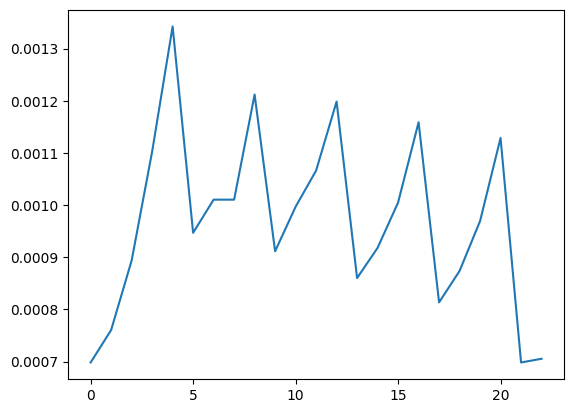

In [88]:
plt.plot(range(23), pd_data["space_abs_mean_err"])

In [81]:
np.argsort(pd_data["space_abs_mean_err"])[::-1]

array([ 8,  4,  3,  6,  7, 10, 14, 11,  2, 18, 15,  5, 12, 19,  9, 13, 16,
       17, 20,  1, 22, 21,  0])

In [82]:
print(np.array(pd_data["pk_pk_x"]).mean())
print(np.array(pd_data["pk_pk_y"]).mean())
print(np.array(pd_data["pk_pk_z"]).mean())

0.04431151739130434
0.15179712608695653
0.1755547886956522
